In [28]:
import pandas as pd

InceptionV3_val_file_path = "results/net-InceptionV3_traindb-ff-c23-720-140-140_face-scale_size-299_seed-41_bestval/ff-c23-720-140-140_val.pkl"
Xception_val_file_path = "results/net-Xception_traindb-ff-c23-720-140-140_face-scale_size-224_seed-41_bestval/ff-c23-720-140-140_val.pkl"
EfficientNet_val_file_path = "results/net-EfficientNetB4_traindb-ff-c23-720-140-140_face-scale_size-224_seed-41_bestval/ff-c23-720-140-140_val.pkl"
InceptionV3_test_file_path = "results/net-InceptionV3_traindb-ff-c23-720-140-140_face-scale_size-299_seed-41_bestval/ff-c23-720-140-140_test.pkl"
Xception_test_file_path = "results/net-Xception_traindb-ff-c23-720-140-140_face-scale_size-224_seed-41_bestval/ff-c23-720-140-140_test.pkl"
EfficientNet_test_file_path = "results/net-EfficientNetB4_traindb-ff-c23-720-140-140_face-scale_size-224_seed-41_bestval/ff-c23-720-140-140_test.pkl"
val_I = pd.read_pickle(InceptionV3_val_file_path)
val_X = pd.read_pickle(Xception_val_file_path)
val_E = pd.read_pickle(EfficientNet_val_file_path)
test_I = pd.read_pickle(InceptionV3_test_file_path)
test_X = pd.read_pickle(Xception_test_file_path)
test_E = pd.read_pickle(EfficientNet_test_file_path)

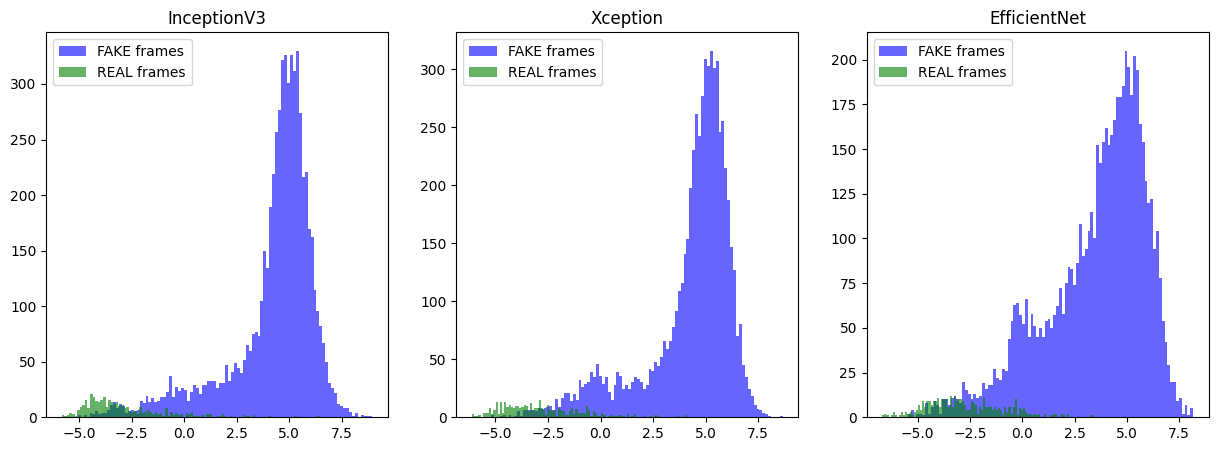

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(val_I[val_I.label == True].score, bins=100, alpha=0.6, color='blue', label='FAKE frames')
plt.hist(val_I[val_I.label == False].score, bins=100, alpha=0.6, color='green', label='REAL frames')
plt.title('InceptionV3')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(val_X[val_X.label == True].score, bins=100, alpha=0.6, color='blue', label='FAKE frames')
plt.hist(val_X[val_X.label == False].score, bins=100, alpha=0.6, color='green', label='REAL frames')
plt.title('Xception')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(val_E[val_E.label == True].score, bins=100, alpha=0.6, color='blue', label='FAKE frames')
plt.hist(val_E[val_E.label == False].score, bins=100, alpha=0.6, color='green', label='REAL frames')
plt.title('EfficientNet')
plt.legend()

plt.show()

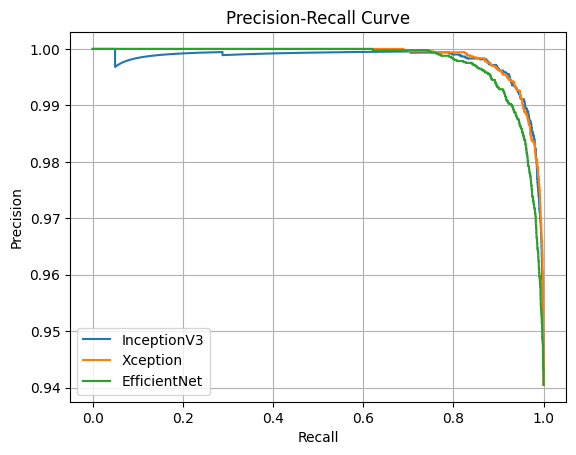

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
# Precision-Recall Curve
precision_I, recall_I, _ = precision_recall_curve(val_I['label'], val_I['score'])
precision_X, recall_X, _ = precision_recall_curve(val_X['label'], val_X['score'])
precision_E, recall_E, _ = precision_recall_curve(val_E['label'], val_E['score'])

plt.plot(recall_I, precision_I, label='InceptionV3')
plt.plot(recall_X, precision_X, label='Xception')
plt.plot(recall_E, precision_E, label='EfficientNet')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
import numpy as np
from sklearn.metrics import accuracy_score



def calculate_best_threshold(scores, labels):
    best_threshold = None
    best_accuracy = 0

    thresholds = np.unique(scores)

    for threshold in thresholds:
        predictions = (scores >= threshold)
        accuracy = accuracy_score(labels, predictions)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_threshold = threshold

    return best_threshold, best_accuracy


best_threshold_I, best_accuracy_I = calculate_best_threshold(val_I['score'], val_I['label'])
best_threshold_X, best_accuracy_X = calculate_best_threshold(val_X['score'], val_X['label'])
best_threshold_E, best_accuracy_E = calculate_best_threshold(val_E['score'], val_E['label'])

# print(f"Best Threshold for InceptionV3: {round(best_threshold_I, 2)}, Accuracy: {round(best_accuracy_I * 100, 2)}")
# print(f"Best Threshold for Xception: {round(best_threshold_X, 2)}, Accuracy: {round(best_accuracy_X * 100, 2)}")
# print(f"Best Threshold for EfficientNet: {round(best_threshold_E, 2)}, Accuracy: {round(best_accuracy_E * 100, 2)}")

# apply the best threshold on test set
predictions_I = (test_I['score'] >= best_threshold_I)
accuracy_I = round(accuracy_score(test_I['label'], predictions_I) * 100, 2)

predictions_X = (test_X['score'] >= best_threshold_X)
accuracy_X = round(accuracy_score(test_X['label'], predictions_X) * 100, 2)

predictions_E = (test_E['score'] >= best_threshold_E)
accuracy_E = round(accuracy_score(test_E['label'], predictions_E) * 100, 2)

print(f"Accuracy on InceptionV3 test set: {accuracy_I}")
print(f"Accuracy on Xception test set: {accuracy_X}")
print(f"Accuracy on EfficientNet test set: {accuracy_E}")

Accuracy on InceptionV3 test set: 96.62
Accuracy on Xception test set: 96.65
Accuracy on EfficientNet test set: 95.63


In [34]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix_I = confusion_matrix(test_I['label'], predictions_I)
confusion_matrix_X = confusion_matrix(test_X['label'], predictions_X)
confusion_matrix_E = confusion_matrix(test_E['label'], predictions_E)

print("Confusion Matrix for InceptionV3:")
print(confusion_matrix_I)
print()

print("Confusion Matrix for Xception:")
print(confusion_matrix_X)
print()

print("Confusion Matrix for EfficientNet:")
print(confusion_matrix_E)
print()

precision_I = precision_score(test_I['label'], predictions_I)
recall_I = recall_score(test_I['label'], predictions_I)

precision_X = precision_score(test_X['label'], predictions_X)
recall_X = recall_score(test_X['label'], predictions_X)

precision_E = precision_score(test_E['label'], predictions_E)
recall_E = recall_score(test_E['label'], predictions_E)

print(f"Precision for InceptionV3: {precision_I:.3f}")
print(f"Recall for InceptionV3: {recall_I:.3f}")
print()

print(f"Precision for Xception: {precision_X:.3f}")
print(f"Recall for Xception: {recall_X:.3f}")
print()

print(f"Precision for EfficientNet: {precision_E:.3f}")
print(f"Recall for EfficientNet: {recall_E:.3f}")
print()
f1_I = f1_score(test_I['label'], predictions_I)
f1_X = f1_score(test_X['label'], predictions_X)
f1_E = f1_score(test_E['label'], predictions_E)

print(f"F1 Score for InceptionV3: {f1_I:.3f}")
print(f"F1 Score for Xception: {f1_X:.3f}")
print(f"F1 Score for EfficientNet: {f1_E:.3f}")

Confusion Matrix for InceptionV3:
[[ 221  111]
 [ 101 5836]]

Confusion Matrix for Xception:
[[ 178  154]
 [  56 5881]]

Confusion Matrix for EfficientNet:
[[ 143  189]
 [  85 5852]]

Precision for InceptionV3: 0.981
Recall for InceptionV3: 0.983

Precision for Xception: 0.974
Recall for Xception: 0.991

Precision for EfficientNet: 0.969
Recall for EfficientNet: 0.986

F1 Score for InceptionV3: 0.982
F1 Score for Xception: 0.982
F1 Score for EfficientNet: 0.977
